<a href="https://colab.research.google.com/github/muskan9887/Ensembe_techniques/blob/main/bagging_learning_tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df = pd.read_csv('/content/Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df = df.iloc[:,1:]

In [6]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
encoder = LabelEncoder()

In [9]:
df['Species'] = encoder.fit_transform(df['Species'])

In [10]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [13]:
df.sample(10)

,SepalWidthCm,PetalLengthCm,Species
57,2.4,3.3,1
63,2.9,4.7,1
84,3.0,4.5,1
108,2.5,5.8,2
148,3.4,5.4,2
135,3.0,6.1,2
52,3.1,4.9,1
70,3.2,4.8,1
121,2.8,4.9,2
104,3.0,5.8,2


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

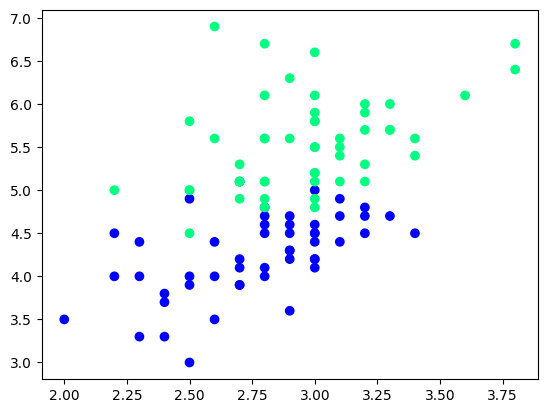

In [21]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [22]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
107,2.9,6.3,2
65,3.1,4.4,1
95,3.0,4.2,1
98,2.5,3.0,1
73,2.8,4.7,1
63,2.9,4.7,1
52,3.1,4.9,1
50,3.2,4.7,1
105,3.0,6.6,2
54,2.8,4.6,1


In [23]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [24]:
df_train

,SepalWidthCm,PetalLengthCm,Species
126,2.8,4.8,2
75,3.0,4.4,1
136,3.4,5.6,2
54,2.8,4.6,1
66,3.0,4.5,1
121,2.8,4.9,2
135,3.0,6.1,2
72,2.5,4.9,1
50,3.2,4.7,1
110,3.2,5.1,2


In [25]:
df_val

,SepalWidthCm,PetalLengthCm,Species
53,2.3,4.0,1
86,3.1,4.7,1
124,3.3,5.7,2
58,2.9,4.6,1
84,3.0,4.5,1


In [26]:
df_test

,SepalWidthCm,PetalLengthCm,Species
91,3.0,4.6,1
57,2.4,3.3,1
134,2.6,5.6,2
130,2.8,6.1,2
118,2.6,6.9,2


In [27]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [28]:
y_test

array([1, 1, 2, 1, 1])

# Case 1 - Bagging

In [29]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
75,3.0,4.4,1
75,3.0,4.4,1
136,3.4,5.6,2
54,2.8,4.6,1
50,3.2,4.7,1
72,2.5,4.9,1
136,3.4,5.6,2
121,2.8,4.9,2


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [31]:
dt_bag1 = DecisionTreeClassifier()

In [32]:
evaluate(dt_bag1,X,y)

NameError: name 'evaluate' is not defined

In [ ]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
69,2.5,3.9,1
68,2.2,4.5,1
53,2.3,4.0,1
53,2.3,4.0,1
74,2.9,4.3,1
97,2.9,4.3,1
74,2.9,4.3,1
69,2.5,3.9,1


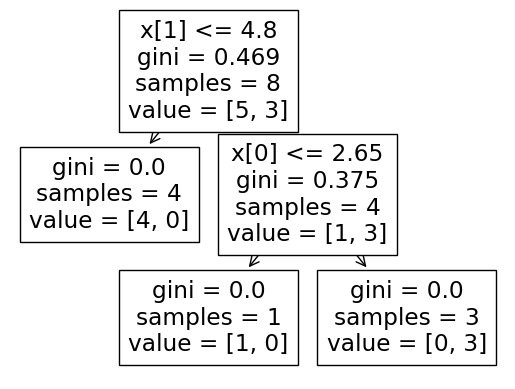

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


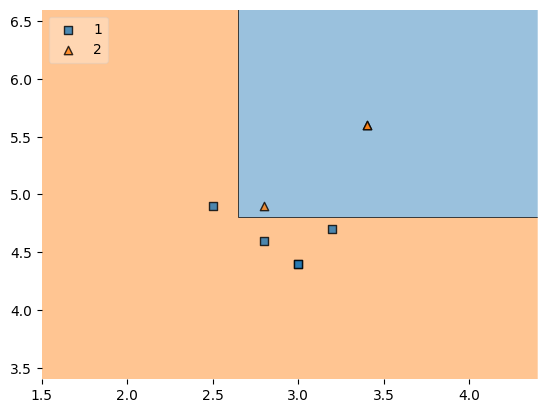

In [34]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [36]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
75,3.0,4.4,1
136,3.4,5.6,2
126,2.8,4.8,2
135,3.0,6.1,2
50,3.2,4.7,1
66,3.0,4.5,1
121,2.8,4.9,2
75,3.0,4.4,1


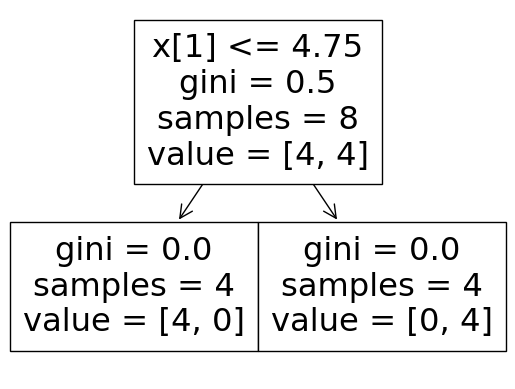

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


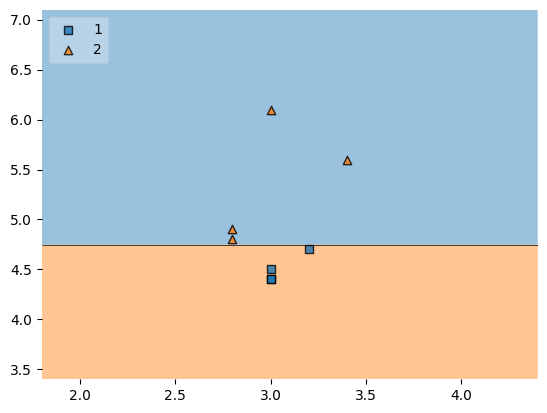

In [37]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [33]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))


## Predict

In [38]:
df_test

,SepalWidthCm,PetalLengthCm,Species
91,3.0,4.6,1
57,2.4,3.3,1
134,2.6,5.6,2
130,2.8,6.1,2
118,2.6,6.9,2


In [39]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# Pasting

In [40]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
126,2.8,4.8,2
75,3.0,4.4,1
136,3.4,5.6,2
54,2.8,4.6,1
66,3.0,4.5,1
121,2.8,4.9,2
135,3.0,6.1,2
72,2.5,4.9,1
50,3.2,4.7,1
110,3.2,5.1,2


In [41]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
66,3.0,4.5,1
126,2.8,4.8,2
72,2.5,4.9,1
110,3.2,5.1,2
136,3.4,5.6,2
121,2.8,4.9,2
75,3.0,4.4,1
135,3.0,6.1,2


# Random Subspaces

In [45]:
df1 = pd.read_csv('/content/Iris.csv')
df1 = df1.sample(10)

In [46]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
86,87,6.7,3.1,4.7,1.5,Iris-versicolor
48,49,5.3,3.7,1.5,0.2,Iris-setosa
25,26,5.0,3.0,1.6,0.2,Iris-setosa
125,126,7.2,3.2,6.0,1.8,Iris-virginica
49,50,5.0,3.3,1.4,0.2,Iris-setosa
31,32,5.4,3.4,1.5,0.4,Iris-setosa
70,71,5.9,3.2,4.8,1.8,Iris-versicolor
127,128,6.1,3.0,4.9,1.8,Iris-virginica
9,10,4.9,3.1,1.5,0.1,Iris-setosa
39,40,5.1,3.4,1.5,0.2,Iris-setosa


In [47]:
df1.sample(2,replace=True,axis=1)

,PetalLengthCm,Id
86,4.7,87
48,1.5,49
25,1.6,26
125,6.0,126
49,1.4,50
31,1.5,32
70,4.8,71
127,4.9,128
9,1.5,10
39,1.5,40


# Random Patches

In [48]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
86,87,6.7,3.1,4.7,1.5,Iris-versicolor
48,49,5.3,3.7,1.5,0.2,Iris-setosa
25,26,5.0,3.0,1.6,0.2,Iris-setosa
125,126,7.2,3.2,6.0,1.8,Iris-virginica
49,50,5.0,3.3,1.4,0.2,Iris-setosa
31,32,5.4,3.4,1.5,0.4,Iris-setosa
70,71,5.9,3.2,4.8,1.8,Iris-versicolor
127,128,6.1,3.0,4.9,1.8,Iris-virginica
9,10,4.9,3.1,1.5,0.1,Iris-setosa
39,40,5.1,3.4,1.5,0.2,Iris-setosa


In [49]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,PetalWidthCm,SepalLengthCm
48,0.2,5.3
70,1.8,5.9
9,0.1,4.9
9,0.1,4.9
49,0.2,5.0
86,1.5,6.7
70,1.8,5.9
39,0.2,5.1
